# Visualize acceptance and publication times for PLOS Journals using data from PubMed

In [1]:
# suppress warnings for notebook hygeine
options(warn = -1)

# import libraries
library(readr)
library(dplyr, warn=F)
library(ggplot2)
library(lubridate)
library(grDevices)
library(graphics)
library(tidyr)

In [2]:
# define date column types
col_types = list(
  date_accepted = readr::col_datetime("%Y/%m/%d %S:%OS"),
  date_epublish = readr::col_datetime("%Y/%m/%d %S:%OS"),
  date_medline  = readr::col_datetime("%Y/%m/%d %S:%OS"),
  date_pubmed   = readr::col_datetime("%Y/%m/%d %S:%OS"),
  date_received = readr::col_datetime("%Y/%m/%d %S:%OS")
)

# read in tsv of pubmed records for PLOS articles
pubmed_df = readr::read_tsv('data/pubmed-plos.tsv.gz', col_types = col_types) %>%
  dplyr::filter(! is.na(date_received)) %>%
  dplyr::filter(! is.na(date_accepted)) %>%
  dplyr::filter(! is.na(date_epublish)) %>%
  dplyr::mutate(publication_days = as.numeric(date_epublish - date_accepted) / 86400) %>%
  dplyr::filter(publication_days >= 0 & publication_days <= 1000) %>%
  dplyr::mutate(acceptance_days = as.numeric(date_accepted - date_received) / 86400) %>%
  dplyr::filter(acceptance_days >= 0 & acceptance_days <= 1500) %>%
  dplyr::mutate(year_epublish = lubridate::decimal_date(date_epublish))

head(pubmed_df)

,date_accepted,date_epublish,date_medline,date_pubmed,date_received,doi,epub_date,journal,journal_abbrev,pubdate,pubmed_id,pubtype,publication_days,acceptance_days,year_epublish
1,2015-05-12,2015-06-22,2015-06-23,2015-06-23,2015-01-23,10.1371/journal.pbio.1002181,2015 Jun 22,PLoS biology,PLoS Biol,2015 Jun,26098891,Journal Article,41,109,2015.471
2,2015-05-12,2015-06-22,2015-06-23,2015-06-23,2014-10-22,10.1371/journal.pbio.1002180,2015 Jun 22,PLoS biology,PLoS Biol,2015 Jun,26098873,Journal Article,41,202,2015.471
3,2015-05-08,2015-06-19,2015-06-20,2015-06-20,2014-10-27,10.1371/journal.pbio.1002172,2015 Jun 19,PLoS biology,PLoS Biol,2015 Jun,26090784,Journal Article,42,193,2015.463
4,2015-05-08,2015-06-18,2015-06-19,2015-06-19,2014-07-23,10.1371/journal.pbio.1002173,2015 Jun 18,PLoS biology,PLoS Biol,2015 Jun,26086735,Journal Article,41,289,2015.46
5,2015-04-30,2015-06-10,2015-06-11,2015-06-11,2014-07-28,10.1371/journal.pbio.1002167,2015 Jun 10,PLoS biology,PLoS Biol,2015 Jun,26061091,Journal Article,41,276,2015.438
6,2015-05-07,2015-06-04,2015-06-05,2015-06-05,2014-08-03,10.1371/journal.pbio.1002169,2015 Jun 4,PLoS biology,PLoS Biol,2015 Jun,26042786,Journal Article,28,277,2015.422


In [3]:
# Calculate the number of articles per journal
count_df = pubmed_df %>%
  dplyr::group_by(journal_abbrev) %>%
  dplyr::summarize(
    articles = n()
  ) %>% dplyr::bind_rows(
  dplyr::data_frame(journal_abbrev='Family', articles=nrow(pubmed_df))) %>%
  dplyr::rename(panel=journal_abbrev) %>%
  dplyr::mutate(year_epublish=-Inf, publication_days=Inf, days=Inf) %>%
  dplyr::mutate(label = paste0('n = ', format(articles, big.mark=',', trim=T)))

In [4]:
# color journals by their website's palette
journal_cols = c(
  'PLoS Comput Biol'   = '#16A127', 
  'PLoS Biol'          = '#16A127',
  'PLoS One'           = '#F8AF2D',
  'PLoS Med'           = '#891FB1',
  'PLoS Negl Trop Dis' ='#891FB1',
  'PLoS Pathog'        ='#891FB1',
  'PLoS Genet'         = '#16A127'
)

geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so 

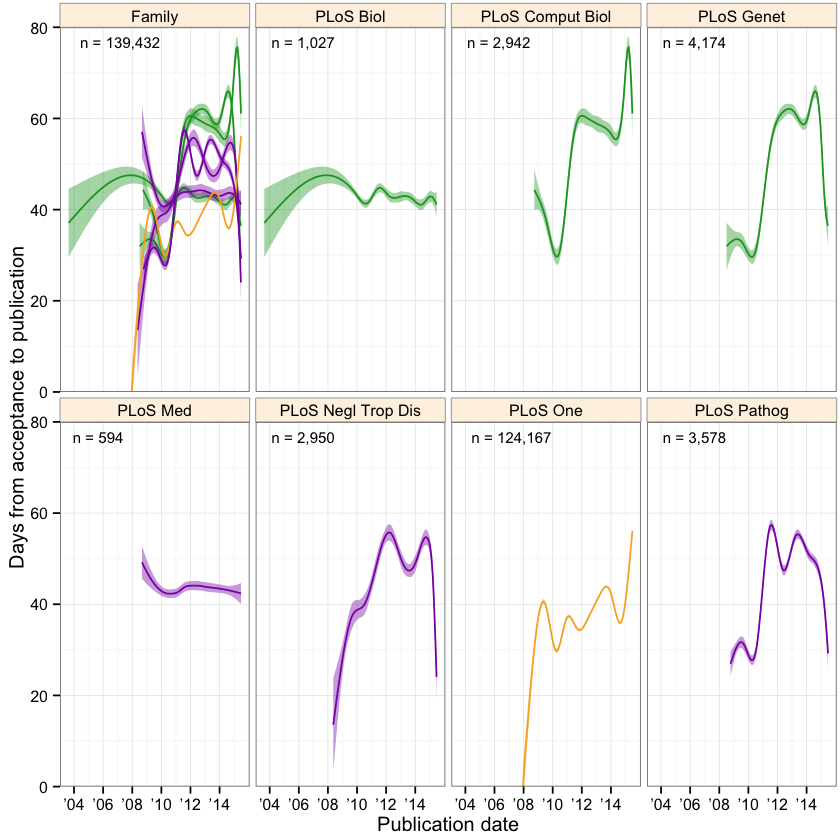

In [5]:
# plot publication delay versus year
gg_accept = pubmed_df %>%
  dplyr::mutate(panel=journal_abbrev) %>%
  dplyr::bind_rows(pubmed_df %>% dplyr::mutate(panel='Family')) %>%
  ggplot2::ggplot(ggplot2::aes(x = year_epublish, y = publication_days)) + 
  ggplot2::theme_bw() +
  ggplot2::facet_wrap(~ panel, ncol=4) +
  ggplot2::geom_smooth(aes(col=journal_abbrev, fill=journal_abbrev)) +
  ggplot2::scale_color_manual(values=journal_cols, guide=F) +
  ggplot2::scale_fill_manual(values=journal_cols, guide=F) +
  ggplot2::geom_text(aes(label=label), data=count_df, hjust=-0.25, vjust=1.9, parse=F, size=3.2) +
  ggplot2::xlab('Publication date') +
  ggplot2::ylab('Days from acceptance to publication') +
  ggplot2::scale_x_continuous(breaks=seq(2004, 2014, 2), labels=c('’04', '’06', '’08', '’10', '’12', '’14')) +
  ggplot2::coord_cartesian(ylim=c(0, 80)) +
  ggplot2::theme(strip.background=ggplot2::element_rect(fill='#fef2e2')) + 
  ggplot2::theme(plot.margin=grid::unit(c(2, 2, 2, 2), 'points'))

gg_accept

geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so 

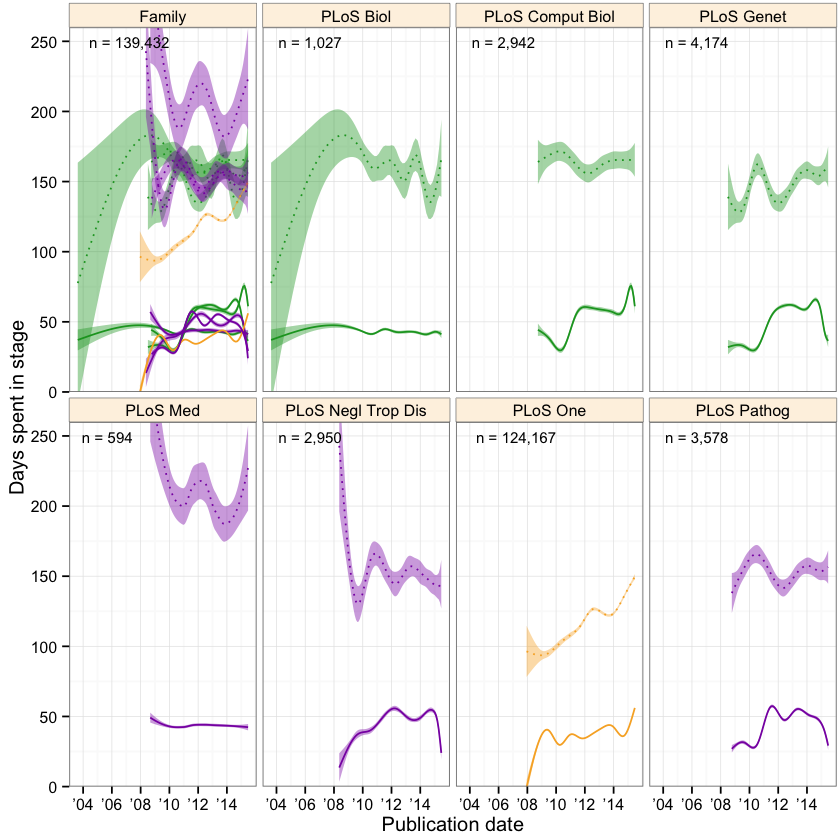

In [11]:
# plot publication and acceptance delays versus year
gg_stage = pubmed_df %>%
  dplyr::mutate(panel=journal_abbrev) %>%
  dplyr::bind_rows(pubmed_df %>% dplyr::mutate(panel='Family')) %>%
  tidyr::gather(stage, days, publication_days:acceptance_days) %>%
  ggplot2::ggplot(ggplot2::aes(x = year_epublish, y = days)) + 
  ggplot2::theme_bw() +
  ggplot2::facet_wrap(~ panel, ncol=4) +
  ggplot2::geom_smooth(aes(col=journal_abbrev, fill=journal_abbrev, linetype=stage)) +
  ggplot2::scale_color_manual(values=journal_cols, guide=F) +
  ggplot2::scale_fill_manual(values=journal_cols, guide=F) +
  ggplot2::scale_linetype_manual(values=c('solid', 'dotted'), guide=F) +
  ggplot2::geom_text(aes(label=label), data=count_df, hjust=-0.25, vjust=1.9, parse=F, size=3.2) +
  ggplot2::xlab('Publication date') +
  ggplot2::ylab('Days spent in stage') +
  ggplot2::scale_x_continuous(breaks=seq(2004, 2014, 2), labels=c('’04', '’06', '’08', '’10', '’12', '’14')) +
  ggplot2::coord_cartesian(ylim=c(0, 260)) +
  ggplot2::theme(strip.background=ggplot2::element_rect(fill='#fef2e2')) +
  ggplot2::theme(plot.margin=grid::unit(c(2, 2, 2, 2), 'points'))

gg_stage

In [13]:
# save the figure in several formats
ggplot2::ggsave(filename = 'figure/plos-acceptance.png', gg_accept, dpi=300, width=8, height=5)
ggplot2::ggsave(filename = 'figure/plos-acceptance.svg', gg_accept, width=8, height=5)

ggplot2::ggsave(filename = 'figure/plos-stages.png', gg_stage, dpi=300, width=8, height=5)
ggplot2::ggsave(filename = 'figure/plos-stages.svg', gg_stage, width=8, height=5.5)

geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so 